In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pathlib 
import os
import joblib

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [75]:
cur_path  = os.getcwd()

devices_df = pd.read_csv(cur_path + '/devices.csv')
readings_df = pd.read_csv(cur_path + '/sampled_readings.csv')
reading_types_df = pd.read_csv(cur_path + '/reading_types.csv')

In [76]:
# hour_mapping (1 if between 8am and 6pm)

readings_df['date'] = pd.to_datetime(readings_df['date'])

readings_df['work_hours'] = readings_df['date'].dt.hour.between(8, 18)
readings_df['work_hours'].map({True: 1, False: 0})


0           0
1           0
2           0
3           0
4           1
           ..
39004219    1
39004220    0
39004221    0
39004222    1
39004223    0
Name: work_hours, Length: 39004224, dtype: int64

In [77]:
# season mapping

readings_df['season'] = readings_df['date'].dt.month.map({
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
})

In [78]:
# day of week mapping (1 weekday, 0 weekend)

readings_df['day type'] = readings_df['date'].dt.dayofweek.map({
    0: 1,
    1: 1,
    2: 1,
    3: 1,
    4: 1,
    5: 0, 
    6: 0
})

In [79]:
#merging devices with sampleled readings

readings_df = pd.merge(readings_df, devices_df, on='device_id', how='inner')

readings_df.to_csv('preprocessed.csv')

In [80]:
# seperate into RH + temp and others
df_11_12 = readings_df[readings_df['value_type_id'].isin([11, 12])]
df_other = readings_df[~readings_df['value_type_id'].isin([11, 12])]

In [81]:
#nomalize categories
# df_11_12 = pd.get_dummies(df_11_12, columns=['season'])
# df_other = pd.get_dummies(df_other, columns=['season'])

<function matplotlib.pyplot.show(close=None, block=None)>

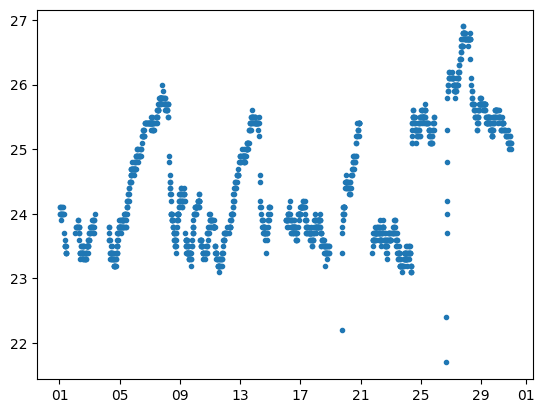

In [82]:
#to filter value_type_id and device_id
filtered_df = readings_df[(readings_df['value_type_id'] == 11) & (readings_df['device_id'] == 1)]

start_date = '2023-8-01'
end_date = '2023-8-31'
filtered_df = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

# scatter for >1 day
plt.scatter(filtered_df['date'], filtered_df['value'], marker='.')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))


# scatter for <1 day
# plt.scatter(filtered_df['date'].dt.hour + filtered_df['date'].dt.minute / 60, filtered_df['value'], marker='.')


plt.show



In [86]:
# Augmented Dickey-Fuller test
# determines if a series is stationary

test_series_data = filtered_df[['value']]
test_series_data.index = pd.to_datetime(filtered_df['date'])

results = adfuller(test_series_data)

print('Test Statistic:', results[0])
print('P-Value:', results[1])


Test Statistic: -22.54549152601055
P-Value: 0.0


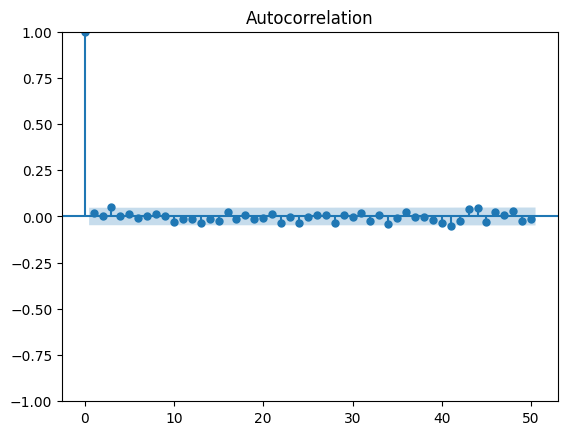

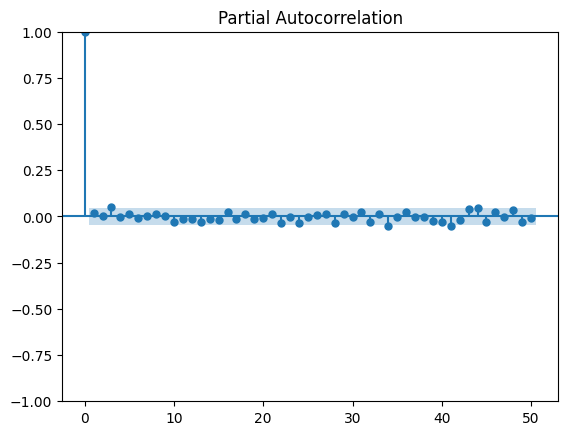

In [87]:

# ACF AND PACF to determine autoregressive term (p) and moving averages term (q)

time_series_data = filtered_df[['value']]
time_series_data.index = pd.to_datetime(filtered_df['date'])

# ACF
plot_acf(time_series_data['value'], lags = 50)
plt.show()

# PACF
plot_pacf(time_series_data['value'], lags = 50)
plt.show()

In [88]:
# 4funning idk what this is 
time_series_data = filtered_df[['date', 'value']]

time_series_data = time_series_data.set_index('date')

train_size = int(len(time_series_data) * 0.8)
train, test - time_series_data[:train_size], time_series_data[train_size:]


#SARIMA model
order = (p, d, q, s)
model = SARIMAX(train, order = order, seasonal_order=(p, d, q, s))
fit_model = model.fit(disp=False)

#predictions
start_index = len(train)
end_index = start_index + len(test) - 1
predictions = fit_model.predict(start = start_index, end = end_index, dynamic = False)

mse = mean_squared_error(test['value'], predictions)

plt.show()



NameError: name 'train' is not defined